<a href="https://colab.research.google.com/github/Skuerjuan/spotify_chona/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Spotify
## Felipe Maierowicz
## 4°D

In [1]:
try:
    import pandas as pd
except ImportError:
    print("Pandas not installed")
    %pip install pandas --user

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib not installed")
    %pip install matplotlib --user

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2025/refs/heads/main/StreamingHistory_Extended.csv"

dataset = pd.read_csv(archivo)
filtro = dataset["is_podcast"] == False
dataset = dataset[filtro] # Borrando los podcasts
dataset.drop(["user_agent_decrypted", "episode_name", "episode_show_name", "spotify_episode_uri", "skipped", "is_podcast"], axis="columns", inplace=True)
# Borrando las columnas relacionadas a los podcasts y skipped se puede sacar de "reason_end"
dataset.head()

<ipython-input-3-a81948ab4373>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(archivo)


,ts,username,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,offline_timestamp
0,2020-12-06T02:51:11Z,11145402699,"iOS 14.2 (iPhone12,3)",145610,AR,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,trackdone,fwdbtn,True,False,1607222710755
1,2020-12-06T02:53:31Z,11145402699,"iOS 14.2 (iPhone12,3)",138692,AR,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,fwdbtn,fwdbtn,True,False,1607223071185
2,2020-12-06T02:53:53Z,11145402699,"iOS 14.2 (iPhone12,3)",22662,AR,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,fwdbtn,fwdbtn,True,False,1607223210387
3,2020-12-06T02:53:56Z,11145402699,"iOS 14.2 (iPhone12,3)",2716,AR,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,fwdbtn,fwdbtn,True,False,1607223233165
4,2020-12-06T02:53:57Z,11145402699,"iOS 14.2 (iPhone12,3)",116,AR,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,fwdbtn,fwdbtn,True,False,1607223236453


In [4]:
'''
---Análisis de las Columnas:
-shuffle, reason_start, reason_end u offline dependen del
comportamiento del usuario (ms_played depende de la duración de la canción
y de si skippeó o la escuchó entera, que se puede sacar de reason_end)
-columnas de master + spotify_track_uri dependen de la canción y el autor
-ts, offline_timestamp dependen de la fecha y hora de la escucha
-username, platform, conn_country y user_agent dependen
del usuario y el dispositivo
'''
dataset.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'reason_start',
       'reason_end', 'shuffle', 'offline', 'offline_timestamp'],
      dtype='object')

In [5]:
# Primer y última fecha
dataset['ts'] = pd.to_datetime(dataset['ts']) #typecasting a fecha
print(dataset['ts'].min(), " - ", dataset['ts'].max())

2014-06-27 18:01:15+00:00  -  2024-05-23 23:56:20+00:00


In [6]:
# Cantidad de canciones

songs = dataset["spotify_track_uri"]
songs = songs.unique() #contar sin repetidos
len(songs)

11557

In [17]:
# Duración reproducciones

time_spent_song = dataset.groupby('spotify_track_uri')['ms_played'].sum().reset_index() #ordenando por uri única y creando un index
track_names = dataset[['master_metadata_track_name', "master_metadata_album_artist_name", "spotify_track_uri"]].drop_duplicates()

time_spent_song = time_spent_song.merge(track_names, on="spotify_track_uri")
#mergeando con nombres y artistas para tener datos completos
time_spent_song = time_spent_song.sort_values(by="ms_played", ascending=False) #ordenando
time_spent_song.head()

,spotify_track_uri,ms_played,master_metadata_track_name,master_metadata_album_artist_name
1411,spotify:track:0wXuerDYiBnERgIpbb3JBR,56637046,Redbone,Childish Gambino
7067,spotify:track:4lmhVHC5sU5PLqpPDlcdLV,50999244,Rain,Vinnie Moore
8044,spotify:track:5RrJCusmR1J54b5ivqdWIu,46220252,Spain,Chick Corea
2028,spotify:track:1NeLwFETswx8Fzxl2AFl91,45732605,Something About Us,Daft Punk
9062,spotify:track:69kOkLUCkxIZYexIgSG8rq,45517878,Get Lucky (feat. Pharrell Williams and Nile Ro...,Daft Punk


In [18]:
# Duración por artista
#similar al punto anterior
time_spent_artist = dataset.groupby("master_metadata_album_artist_name")['ms_played'].sum()
time_spent_artist = time_spent_artist.sort_values(ascending=False)
time_spent_artist.head()

,ms_played
master_metadata_album_artist_name,
Charly García,295324381
Luis Alberto Spinetta,276254779
Childish Gambino,259892455
Serú Girán,243400227
Daft Punk,228993913


In [21]:
# canción más escuchada
most_listened_song = time_spent_song.iloc[0]
most_listened_song

,1411
spotify_track_uri,spotify:track:0wXuerDYiBnERgIpbb3JBR
ms_played,56637046
master_metadata_track_name,Redbone
master_metadata_album_artist_name,Childish Gambino


In [22]:
# artista más escuchado
most_listened_artist = time_spent_artist.idxmax()
most_listened_artist

'Charly García'

In [26]:
# canción más escuchada de charly

tspent_song_charly = time_spent_song[time_spent_song["master_metadata_album_artist_name"] == most_listened_artist] #filtrando por charly
tspent_song_charly = tspent_song_charly.sort_values(by="ms_played", ascending=False) #ordenando
tspent_song_charly.iloc[0]

,5525
spotify_track_uri,spotify:track:3k9dGCm2R2Y70e87aMHYC3
ms_played,31405810
master_metadata_track_name,Hablando a Tu Corazón
master_metadata_album_artist_name,Charly García


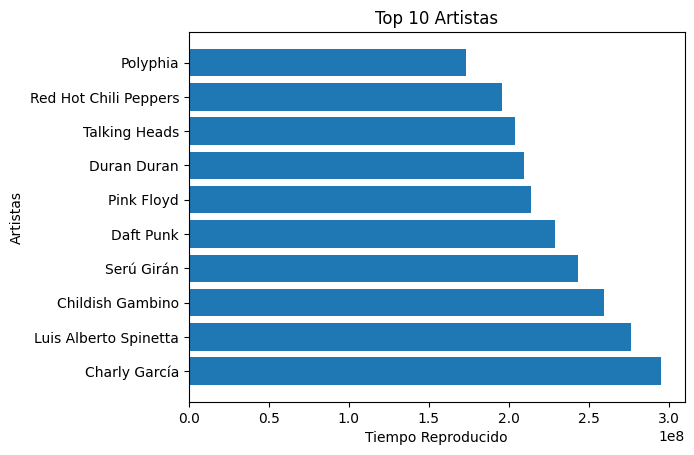

In [45]:
#top 10 artistas


topten_artist = time_spent_artist.head(10)
topten_artist = topten_artist.index.tolist() #conseguida lista de top 10 artistas
fig, ax = plt.subplots()
ax.barh(topten_artist, time_spent_artist.head(10))
ax.set_xlabel("Tiempo Reproducido")
ax.set_ylabel("Artistas")
ax.set_title("Top 10 Artistas")
plt.show()

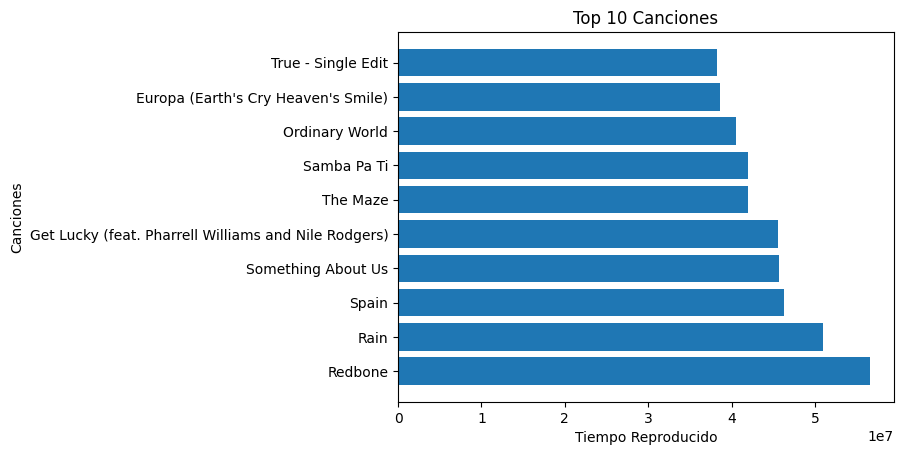

In [47]:
#top 10 canciones

topten_song = time_spent_song.head(10)
topten_song_name = topten_song["master_metadata_track_name"]
topten_song_time = topten_song["ms_played"]
fig, ax = plt.subplots()
ax.barh(topten_song_name, topten_song_time)
ax.set_xlabel("Tiempo Reproducido")
ax.set_ylabel("Canciones")
ax.set_title("Top 10 Canciones")
plt.show()

In [50]:
#Skips

skips = dataset[dataset["reason_end"] == "fwdbtn"][["conn_country", "master_metadata_track_name", ]]
skips

,ts,username,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,offline_timestamp
0,2020-12-06 02:51:11+00:00,11145402699,"iOS 14.2 (iPhone12,3)",145610,AR,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,trackdone,fwdbtn,True,False,1607222710755
1,2020-12-06 02:53:31+00:00,11145402699,"iOS 14.2 (iPhone12,3)",138692,AR,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,fwdbtn,fwdbtn,True,False,1607223071185
2,2020-12-06 02:53:53+00:00,11145402699,"iOS 14.2 (iPhone12,3)",22662,AR,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,fwdbtn,fwdbtn,True,False,1607223210387
3,2020-12-06 02:53:56+00:00,11145402699,"iOS 14.2 (iPhone12,3)",2716,AR,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,fwdbtn,fwdbtn,True,False,1607223233165
4,2020-12-06 02:53:57+00:00,11145402699,"iOS 14.2 (iPhone12,3)",116,AR,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,fwdbtn,fwdbtn,True,False,1607223236453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125344,2018-10-05 22:44:53+00:00,11145402699,"iOS 12.0 (iPhone8,1)",1365,AR,Gente Que No Sabe Lo Que Quiere,Litto Nebbia,Solo Se Trata de Vivir / Solopiano Vol. 1,spotify:track:3u8sP95YHOsYwRQfms6kgc,fwdbtn,fwdbtn,False,False,1538779491211
125345,2018-10-05 22:44:54+00:00,11145402699,"iOS 12.0 (iPhone8,1)",1344,AR,11 Y 6,Fito Paez,Giros,spotify:track:2PkTjm1QAJCZbJ9MqC4RqA,fwdbtn,fwdbtn,False,False,1538779492740
125346,2018-10-05 22:44:55+00:00,11145402699,"iOS 12.0 (iPhone8,1)",832,AR,Mientes,Charly García,Tango 4,spotify:track:670dXRMKr9vVtGk01dYeSr,fwdbtn,fwdbtn,False,False,1538779494205
125347,2018-10-05 22:44:56+00:00,11145402699,"iOS 12.0 (iPhone8,1)",1194,AR,Apostar al Amor,Los Tipitos,Push,spotify:track:6PyBNCpOX5uOjKDNjNNgjq,fwdbtn,fwdbtn,False,False,1538779495059
